In [1]:
import pandas as pd
data = pd.read_csv("/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/02_processed/secc_combined_updated.csv")
data.head()

,shrid2,_mean_p_miss,_core_p_miss,_target_weight_share,_target_group_max_weight_share,dmsp_max_light,dmsp_total_light,dmsp_total_light_cal,dmsp_mean_light,dmsp_mean_light_cal,dmsp_num_cells,dmsp_f_version,year,area_type,secc_cons,secc_cons_pc,secc_pov_rate,secc_pov_rate_tend
0,11-01-001-00001-000002,0.0,0.0,1.0,1.0,0,0,34.120800,0.0,1.8956,18,f18,2011,rural,71243.015625,13509.517578,0.477891,0.391156
1,11-01-001-00001-000005,0.0,0.0,1.0,1.0,0,0,26.538401,0.0,1.8956,14,f18,2011,rural,51652.535156,8611.757812,0.776421,0.679805
2,11-01-001-00001-000006,0.0,0.0,1.0,1.0,0,0,28.434000,0.0,1.8956,15,f18,2011,rural,55198.101562,9498.938477,0.730325,0.624344
3,11-01-001-00001-000007,0.0,0.0,1.0,1.0,0,0,20.851601,0.0,1.8956,11,f18,2011,rural,76926.023438,11964.706055,0.530650,0.386093
4,11-01-001-00001-000009,0.0,0.0,1.0,1.0,0,0,30.329599,0.0,1.8956,16,f18,2011,rural,40571.949219,10137.009766,0.681202,0.661167


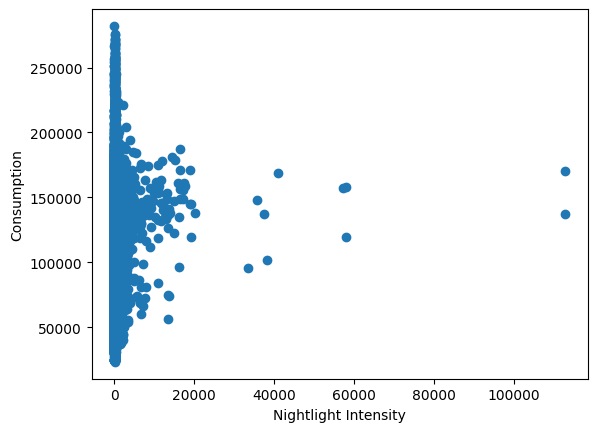

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data['dmsp_total_light_cal'], data['secc_cons'])
plt.xlabel("Nightlight Intensity")
plt.ylabel("Consumption")
plt.show()


In [3]:
data.isnull().sum()


shrid2                            0
_mean_p_miss                      0
_core_p_miss                      0
_target_weight_share              0
_target_group_max_weight_share    0
dmsp_max_light                    0
dmsp_total_light                  0
dmsp_total_light_cal              0
dmsp_mean_light                   0
dmsp_mean_light_cal               0
dmsp_num_cells                    0
dmsp_f_version                    0
year                              0
area_type                         0
secc_cons                         0
secc_cons_pc                      0
secc_pov_rate                     0
secc_pov_rate_tend                0
dtype: int64

In [4]:
data = data.dropna()


In [5]:
data['dmsp_total_light_cal'] = data['dmsp_total_light_cal'].fillna(data['dmsp_total_light_cal'].mean())

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['dmsp_total_light_cal', 'secc_cons']] = scaler.fit_transform(data[['dmsp_total_light_cal', 'secc_cons']])


In [7]:
X = data[['dmsp_total_light_cal']]  # Features
y = data['secc_cons']            # Target


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
pip install tensorflow



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),  # Hidden layer with 16 neurons
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
56743/56743 ━━━━━━━━━━━━━━━━━━━━ 17s 302us/step - loss: 0.0091 - mae: 0.0730 - val_loss: 0.0087 - val_mae: 0.0712
Epoch 2/50
56743/56743 ━━━━━━━━━━━━━━━━━━━━ 17s 305us/step - loss: 0.0091 - mae: 0.0715 - val_loss: 0.0087 - val_mae: 0.0706
Epoch 3/50
56743/56743 ━━━━━━━━━━━━━━━━━━━━ 17s 300us/step - loss: 0.0088 - mae: 0.0714 - val_loss: 0.0087 - val_mae: 0.0725
Epoch 4/50
56743/56743 ━━━━━━━━━━━━━━━━━━━━ 17s 299us/step - loss: 0.0090 - mae: 0.0713 - val_loss: 0.0085 - val_mae: 0.0702
Epoch 5/50
56743/56743 ━━━━━━━━━━━━━━━━━━━━ 17s 300us/step - loss: 0.0086 - mae: 0.0707 - val_loss: 0.0084 - val_mae: 0.0708
Epoch 6/50
56743/56743 ━━━━━━━━━━━━━━━━━━━━ 17s 300us/step - loss: 0.0085 - mae: 0.0706 - val_loss: 0.0083 - val_mae: 0.0694
Epoch 7/50
56743/56743 ━━━━━━━━━━━━━━━━━━━━ 17s 299us/step - loss: 0.0085 - mae: 0.0704 - val_loss: 0.0082 - val_mae: 0.0699
Epoch 8/50
56743/56743 ━━━━━━━━━━━━━━━━━━━━ 17s 296us/step - loss: 0.0083 - mae: 0.0700 - val_loss: 0.0082 - val_mae: 0.0696


In [12]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


3547/3547 ━━━━━━━━━━━━━━━━━━━━ 1s 192us/step - loss: 0.0082 - mae: 0.0695
Test MAE: 0.06916113197803497


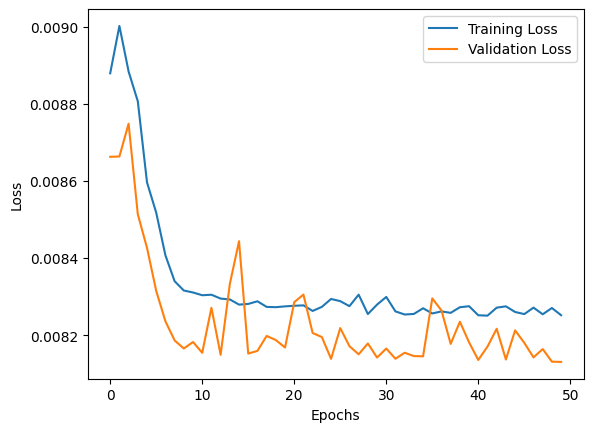

In [13]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# Assuming area_type is already in the dataset
data['area_type'] = data['area_type'].map({'urban': 1, 'rural': 0})  # Convert to binary if needed

# Include area_type in feature scaling
data[['dmsp_total_light_cal', 'secc_cons', 'area_type']] = scaler.fit_transform(
    data[['dmsp_total_light_cal', 'secc_cons', 'area_type']]
)


In [15]:
# Add the interaction term to the dataset
data['light_area_interaction'] = data['dmsp_total_light_cal'] * data['area_type']


In [16]:
# Define features (X) and target (y)
X = data[['dmsp_total_light_cal', 'area_type', 'light_area_interaction']]
y = data['secc_cons']


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)


Epoch 1/50
28372/28372 ━━━━━━━━━━━━━━━━━━━━ 10s 324us/step - loss: 0.0088 - mae: 0.0718 - val_loss: 0.0084 - val_mae: 0.0688
Epoch 2/50
28372/28372 ━━━━━━━━━━━━━━━━━━━━ 9s 319us/step - loss: 0.0082 - mae: 0.0699 - val_loss: 0.0081 - val_mae: 0.0689
Epoch 3/50
28372/28372 ━━━━━━━━━━━━━━━━━━━━ 9s 318us/step - loss: 0.0082 - mae: 0.0698 - val_loss: 0.0081 - val_mae: 0.0695
Epoch 4/50
28372/28372 ━━━━━━━━━━━━━━━━━━━━ 9s 320us/step - loss: 0.0082 - mae: 0.0697 - val_loss: 0.0082 - val_mae: 0.0686
Epoch 5/50
28372/28372 ━━━━━━━━━━━━━━━━━━━━ 9s 320us/step - loss: 0.0082 - mae: 0.0698 - val_loss: 0.0081 - val_mae: 0.0688
Epoch 6/50
28372/28372 ━━━━━━━━━━━━━━━━━━━━ 9s 320us/step - loss: 0.0082 - mae: 0.0697 - val_loss: 0.0081 - val_mae: 0.0695
Epoch 7/50
28372/28372 ━━━━━━━━━━━━━━━━━━━━ 9s 319us/step - loss: 0.0082 - mae: 0.0696 - val_loss: 0.0081 - val_mae: 0.0686
Epoch 8/50
28372/28372 ━━━━━━━━━━━━━━━━━━━━ 9s 318us/step - loss: 0.0081 - mae: 0.0694 - val_loss: 0.0082 - val_mae: 0.0704
Epoch 9

In [20]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Test Loss: 0.008069224655628204, Test MAE: 0.06868739426136017


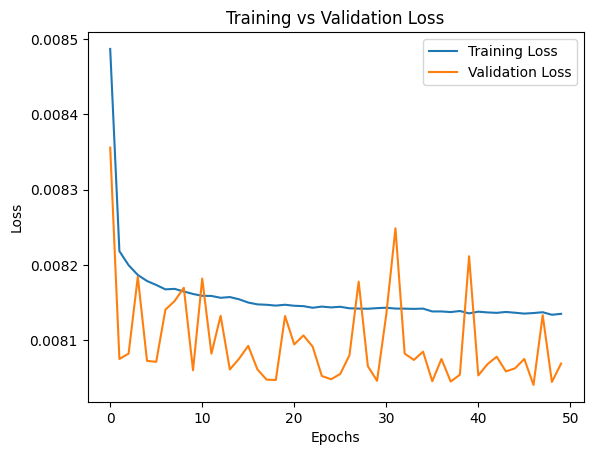

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [22]:
import numpy as np

# Define a wrapper function for model predictions
def model_predict(X):
    return model.predict(X).flatten()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


  4%|▍         | 2/50 [00:00<00:02, 16.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step


  8%|▊         | 4/50 [00:00<00:02, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step


 12%|█▏        | 6/50 [00:00<00:02, 16.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step


 16%|█▌        | 8/50 [00:00<00:02, 17.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step


 20%|██        | 10/50 [00:00<00:02, 17.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step


 24%|██▍       | 12/50 [00:00<00:02, 17.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


 28%|██▊       | 14/50 [00:00<00:02, 17.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step


 32%|███▏      | 16/50 [00:00<00:01, 17.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step


 36%|███▌      | 18/50 [00:01<00:01, 18.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step


 40%|████      | 20/50 [00:01<00:01, 18.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


 44%|████▍     | 22/50 [00:01<00:01, 18.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


 48%|████▊     | 24/50 [00:01<00:01, 18.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step


 52%|█████▏    | 26/50 [00:01<00:01, 18.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step


 56%|█████▌    | 28/50 [00:01<00:01, 18.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step


 60%|██████    | 30/50 [00:01<00:01, 18.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step


 64%|██████▍   | 32/50 [00:01<00:00, 18.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step


 68%|██████▊   | 34/50 [00:01<00:00, 18.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


 72%|███████▏  | 36/50 [00:02<00:00, 18.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


 76%|███████▌  | 38/50 [00:02<00:00, 18.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step


 80%|████████  | 40/50 [00:02<00:00, 18.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step


 84%|████████▍ | 42/50 [00:02<00:00, 18.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step


 88%|████████▊ | 44/50 [00:02<00:00, 17.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step


 92%|█████████▏| 46/50 [00:02<00:00, 17.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


 96%|█████████▌| 48/50 [00:02<00:00, 17.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


100%|██████████| 50/50 [00:02<00:00, 17.79it/s]


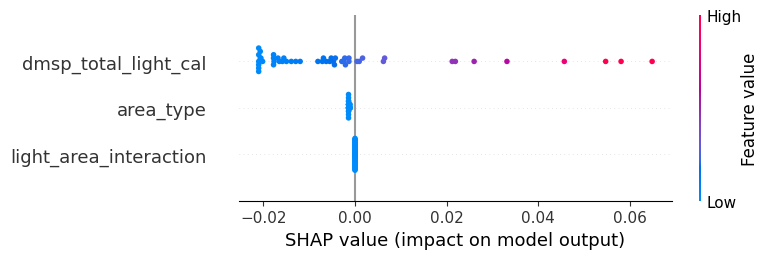

In [23]:
import shap

# Reduce the background dataset with random sampling
background = X_train.sample(100, random_state=42)  # Use 100 samples as background

# Initialize SHAP KernelExplainer with a reduced background
explainer = shap.KernelExplainer(model_predict, background)

# Calculate SHAP values for a sample of the test data
X_test_sample = X_test.sample(50, random_state=42)  # Reduce test data for faster computation
shap_values = explainer.shap_values(X_test_sample)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test_sample)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


  4%|▍         | 2/50 [00:00<00:02, 18.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step


  8%|▊         | 4/50 [00:00<00:02, 19.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step


 12%|█▏        | 6/50 [00:00<00:02, 19.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step


 16%|█▌        | 8/50 [00:00<00:02, 19.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step


 20%|██        | 10/50 [00:00<00:02, 19.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step


 24%|██▍       | 12/50 [00:00<00:02, 18.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step


 28%|██▊       | 14/50 [00:00<00:01, 18.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


 32%|███▏      | 16/50 [00:00<00:01, 19.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


 36%|███▌      | 18/50 [00:00<00:01, 19.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


 40%|████      | 20/50 [00:01<00:01, 19.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


 44%|████▍     | 22/50 [00:01<00:01, 19.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step


 48%|████▊     | 24/50 [00:01<00:01, 19.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step


 52%|█████▏    | 26/50 [00:01<00:01, 19.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step


 58%|█████▊    | 29/50 [00:01<00:01, 19.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step


 62%|██████▏   | 31/50 [00:01<00:00, 19.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step


 66%|██████▌   | 33/50 [00:01<00:00, 19.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step


 70%|███████   | 35/50 [00:01<00:00, 19.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step


 74%|███████▍  | 37/50 [00:01<00:00, 19.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step


 78%|███████▊  | 39/50 [00:01<00:00, 19.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step


 84%|████████▍ | 42/50 [00:02<00:00, 19.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step


 88%|████████▊ | 44/50 [00:02<00:00, 19.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


 92%|█████████▏| 46/50 [00:02<00:00, 19.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step


 96%|█████████▌| 48/50 [00:02<00:00, 19.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step


100%|██████████| 50/50 [00:02<00:00, 19.59it/s]


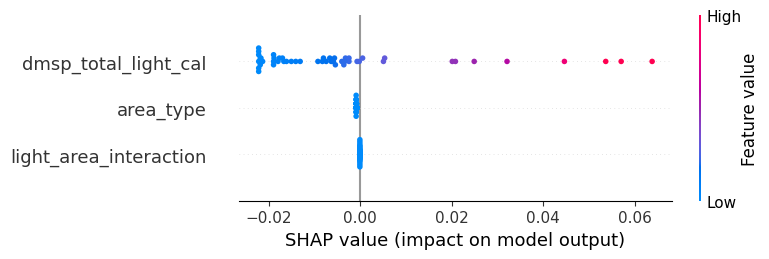

In [24]:
from shap import kmeans

# Reduce the background dataset with K-Means clustering
background = shap.kmeans(X_train, 50)  # Use 50 clusters as the background

# Initialize SHAP KernelExplainer with a reduced background
explainer = shap.KernelExplainer(model_predict, background)

# Calculate SHAP values for a sample of the test data
X_test_sample = X_test.sample(50, random_state=42)  # Reduce test data for faster computation
shap_values = explainer.shap_values(X_test_sample)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test_sample)
